1) importer pandas, charger le fichier "courruption.csv" et afficher le dataframe df 

In [156]:
import pandas as pd
df=pd.read_csv("corruption.csv")
df

,Country,Region,2016,2015,2014,2013,2012
0,New Zealand,Asia Pacific,90,88.0,91.0,91.0,90.0
1,Denmark,Europe and Central Asia,90,91.0,92.0,91.0,90.0
2,Finland,Europe and Central Asia,89,90.0,89.0,89.0,90.0
3,Sweden,Europe and Central Asia,88,89.0,87.0,89.0,88.0
4,Switzerland,Europe and Central Asia,86,86.0,86.0,85.0,86.0
...,...,...,...,...,...,...,...
170,Sudan,Sub-Saharan Africa,14,12.0,11.0,11.0,13.0
171,Syria,Middle East and North Africa,13,18.0,20.0,17.0,26.0
172,Korea (North),Asia Pacific,12,8.0,8.0,8.0,8.0
173,South Sudan,Sub-Saharan Africa,11,15.0,15.0,14.0,NaN


2) Verifier l'existence de valeurs

In [157]:
df.isna().sum()

Country    0
Region     0
2016       0
2015       9
2014       5
2013       3
2012       4
dtype: int64

3) Vérifier l'existence de valeurs abbérantes pour chaque Année (tracer boxplot)

<AxesSubplot: >

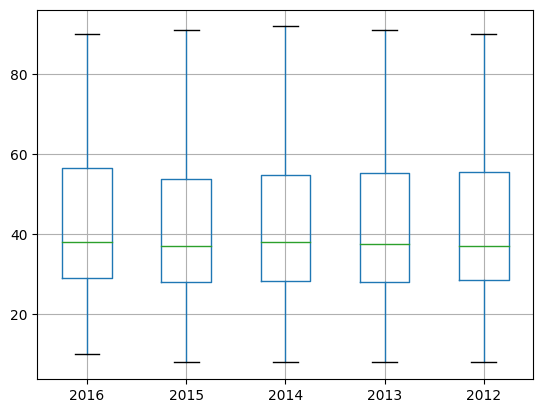

In [158]:
df.boxplot()

4) Dans df1, copier le dataframe df et remplacer les valeurs nulles par la moyenne des valeurs de chaque pays

In [159]:
df1=df.T.fillna(df.mean(axis=1)).T
df1

C:\Users\amria\AppData\Local\Temp\ipykernel_10996\3606568933.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1=df.T.fillna(df.mean(axis=1)).T


,Country,Region,2016,2015,2014,2013,2012
0,New Zealand,Asia Pacific,90,88.0,91.0,91.0,90.0
1,Denmark,Europe and Central Asia,90,91.0,92.0,91.0,90.0
2,Finland,Europe and Central Asia,89,90.0,89.0,89.0,90.0
3,Sweden,Europe and Central Asia,88,89.0,87.0,89.0,88.0
4,Switzerland,Europe and Central Asia,86,86.0,86.0,85.0,86.0
...,...,...,...,...,...,...,...
170,Sudan,Sub-Saharan Africa,14,12.0,11.0,11.0,13.0
171,Syria,Middle East and North Africa,13,18.0,20.0,17.0,26.0
172,Korea (North),Asia Pacific,12,8.0,8.0,8.0,8.0
173,South Sudan,Sub-Saharan Africa,11,15.0,15.0,14.0,13.75


5) Dans df2, afficher pour la Region "Middle East and North Africa" les 2 pays qui ont la somme des indices (2012 --> 2016) les moins et les plus élevés

In [160]:
data = df.query(" Region=='Middle East and North Africa'").filter(["Country","2012","2013","2014","2015","2016"])
data
df2=pd.melt(data,id_vars=["Country"],var_name='year', value_name="CPI")
df2


,Country,year,CPI
0,United Arab Emirates,2012,68.0
1,Qatar,2012,68.0
2,Jordan,2012,48.0
3,Saudi Arabia,2012,44.0
4,Oman,2012,47.0
...,...,...,...
80,Lebanon,2016,28.0
81,Iraq,2016,17.0
82,Libya,2016,14.0
83,Yemen,2016,14.0


In [183]:
datafinale=df2.drop(["year"],axis=1)
data=datafinale.groupby(["Country"]).sum()
data.sort_values(by='CPI', inplace=True)
# data.iloc[[0,-1],:]
data

,CPI
Country,
Iraq,83.0
Libya,84.0
Yemen,92.0
Syria,94.0
Iran,136.0
Lebanon,141.0
Egypt,171.0
Algeria,176.0
Morocco,186.0


6) Dans df3, afficher pour chaque région et pour chaque Année, les pays (country et indice de corruption) qui ont l'indice de corruption les moins et les plus élevés.


In [162]:
df3=df1.melt(id_vars=["Region","Country"],var_name='year', value_name="CPI")
data4=df3.sort_values("CPI").groupby(["Region","year"]).nth([0,-1])
data4.groupby(["Region","year","Country"]).first()

CPI
Region                       year Country                   
Americas                     2012 Canada                84.0
                                  Venezuela             19.0
                             2013 Canada                81.0
                                  Haiti                 19.0
                             2014 Canada                81.0
                                  Haiti                 19.0
                             2015 Canada                83.0
                                  Haiti                 17.0
                             2016 Canada                82.0
                                  Venezuela             17.0
Asia Pacific                 2012 Korea (North)          8.0
                                  New Zealand           90.0
                             2013 Korea (North)          8.0
                                  New Zealand           91.0
                             2014 Korea (North)          8.0
                                  New Zealand           91.0
                             2015 Korea (North)          8.0
                                  New Zealand           88.0
                             2016 Korea (North)         12.0
                                  New Zealand           90.0
Europe and Central Asia      2012 Denmark               90.0
                                  Turkmenistan          17.0
                             2013 Denmark               91.0
                                  Turkmenistan          17.0
                             2014 Denmark               92.0
                                  Turkmenistan          17.0
                             2015 Denmark               91.0
                                  Turkmenistan          18.0
                             2016 Denmark               90.0
                                  Uzbekistan            21.0
Middle East and North Africa 2012 Iraq                  18.0
                                  Qatar                 68.0
                             2013 Libya                 15.0
                                  United Arab Emirates  69.0
                             2014 Iraq                  16.0
                                  United Arab Emirates  70.0
                             2015 Iraq                  16.0
                                  Qatar                 71.0
                             2016 Syria                 13.0
                                  United Arab Emirates  66.0
Sub-Saharan Africa           2012 Botswana              65.0
                                  Somalia                8.0
                             2013 Botswana              64.0
                                  Somalia                8.0
                             2014 Botswana              63.0
                                  Somalia                8.0
                             2015 Botswana              63.0
                                  Somalia                8.0
                             2016 Botswana              60.0
                                  Somalia               10.0

7) A partir de df3, tracer sous forme de barres verticales les valeurs les moins et les plus élevées des indices de corruption pour la région "Middle East and North Africa"

<AxesSubplot: xlabel='year'>

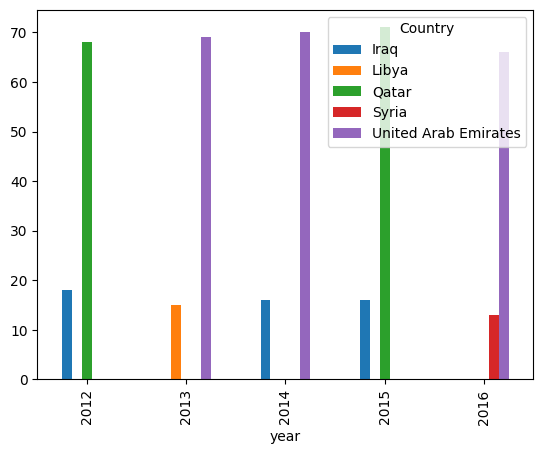

In [176]:

df5=data4.query(" Region=='Middle East and North Africa'")
df5
df6=df5.pivot_table(index='year',columns='Country',values='CPI')
df6.plot.bar()

8) A partir de df1, afficher sous forme de barres horizontales les 5 premiers pays (Top5) de la région "Middle East and North Africa" qui ont la somme de CPI les plus élevées.

<AxesSubplot: ylabel='Country'>

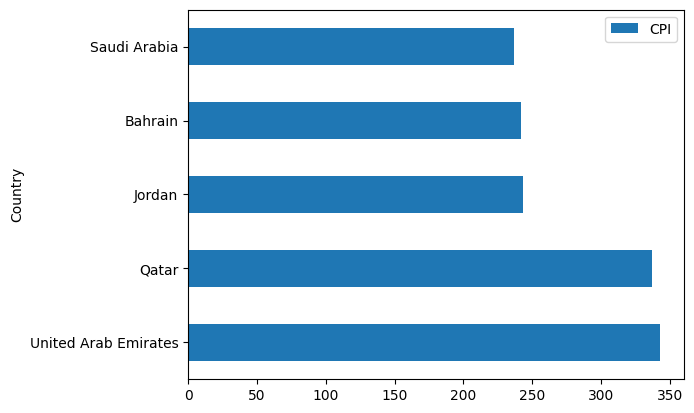

In [191]:
df7 = data.tail().pivot_table(index = 'Country',
values = 'CPI')
df7.sort_values("CPI",ascending=False).plot.barh(stacked = True)

9) A partir de df1:
* Garder seulement les 50 pays (Top 50) qui ont la somme des CPI les plus élevés (2012 --> 2016)
* Tracer sous forme de secteur la répartition de ces pays par région

<AxesSubplot: ylabel='CPI'>

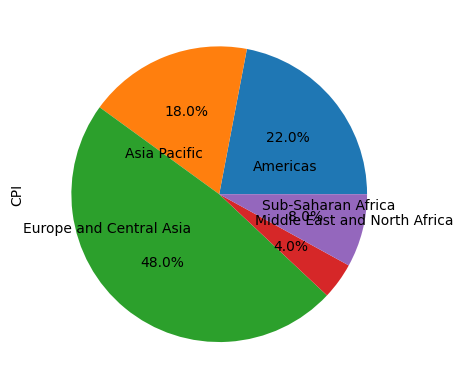

In [229]:
df9 = pd.melt(df1,id_vars = ['Country','Region'], var_name = 'year', value_name='CPI' ).groupby(['Country','Region']).CPI.sum().sort_values(ascending=False)
df9= df9.reset_index().iloc[:50,1:].groupby('Region').count()
df9.CPI.plot.pie(labels = df9.index,
pctdistance = 0.6,
labeldistance = 0.3,
autopct = lambda x:str(round(x, 2))+'%')

10) A partir de df1, afficher pour chaque region, et  sous forme de barres horizontales empilés (stacked) les 2 pays qui ont la somme de CPI la plus élevée. 